In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import astropy.units as u
from astropy.cosmology import Planck18, z_at_value

In [155]:
import matplotlib

font = {'family' : 'serif',
        'size'   : 16}

matplotlib.rc('font', **font)


In [156]:
plotdir = 'powerlaw_3.5_plots/'

In [157]:
Mc_files = ['powerlaw_3.5_lams/lam_0_1_linear_grid_0_to_576.csv']


df1 = pd.DataFrame()
for fi in Mc_files:
    df_temp = pd.read_csv(fi)
    df1 = df1.append(df_temp)
# drop the zero rows that resulted from NoneType Networks
df = df1.loc[~(df1==0).all(axis=1)]


In [158]:
# drop the zero rows that resulted from NoneType Networks
# df = df.loc[~(df==0).all(axis=1)]
df = df[df["Mc"] > 0]



print("Total number of events:",len(df))


df

Total number of events: 100


,Mc,eta,DL,z,m1,m2,M_tot,q,snr,inspiral_t,...,inner_10,inner_11,inner_12,inner_13,inner_14,inner_15,inner_16,inner_17,inner_18,inner_19
5,6.837119,0.244233,2803.222155,0.483264,9.174264,6.754829,15.929094,1.358179,78.513591,366.351684,...,0.979756,0.976745,0.973781,0.970888,0.968075,0.965337,0.962659,0.960018,0.957387,0.954737
8,15.496471,0.242890,13160.605893,1.711408,21.165883,15.057302,36.223186,1.405689,31.879057,93.646238,...,0.735451,0.730977,0.738076,0.754947,0.778620,0.805596,0.832414,0.856014,0.873922,0.884327
12,14.798111,0.247535,21075.277092,2.518842,18.797753,15.402071,34.199825,1.220469,19.247242,101.204909,...,0.715671,0.712502,0.722304,0.742866,0.770690,0.801788,0.832319,0.858967,0.879105,0.890838
18,6.217682,0.248945,2074.246831,0.374631,7.625461,6.695302,14.320763,1.138927,98.460716,429.053593,...,0.982434,0.979781,0.977152,0.974566,0.972031,0.969542,0.967087,0.964647,0.962202,0.959728
27,5.858331,0.243843,258.052501,0.055893,7.902940,5.758870,13.661810,1.372308,753.685653,473.598316,...,0.983993,0.981528,0.979072,0.976643,0.974250,0.971892,0.969559,0.967238,0.964912,0.962563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,7.602180,0.248660,3921.870487,0.638681,9.402176,8.119452,17.521628,1.157981,61.146100,307.170551,...,0.976274,0.972847,0.969509,0.966284,0.963179,0.960184,0.957275,0.954419,0.951579,0.948718
551,4.913374,0.249883,599.918929,0.124116,5.767619,5.523516,11.291135,1.044193,281.830296,634.423245,...,0.987780,0.985830,0.983863,0.981889,0.979916,0.977944,0.975967,0.973978,0.971967,0.969923
557,5.484030,0.229182,4245.457838,0.681713,8.552047,4.721647,13.273694,1.811242,43.306817,528.309375,...,0.985262,0.982941,0.980614,0.978301,0.976011,0.973746,0.971503,0.969270,0.967036,0.964787
559,87.978565,0.242155,38370.605973,4.157313,121.260890,84.764563,206.025454,1.430561,39.861943,4.500707,...,0.692586,0.641583,0.590988,0.542168,0.496560,0.455619,0.420703,0.392896,0.372768,0.360179


In [159]:
n_lams = 20
lam_colnames = ['lam_'+str(id) for id in range(n_lams)]
lams = df[lam_colnames].iloc[0].values

bias_colnames = ['bias_'+str(id) for id in range(n_lams)]
bias_lams = df[bias_colnames]
rel_bias_lams = df[bias_colnames].div(df["Mc"], axis='rows')

inner_colnames = ['inner_'+str(id) for id in range(n_lams)]
inner_prod_lams = df[inner_colnames]

rel_bias_lams

,bias_0,bias_1,bias_2,bias_3,bias_4,bias_5,bias_6,bias_7,bias_8,bias_9,bias_10,bias_11,bias_12,bias_13,bias_14,bias_15,bias_16,bias_17,bias_18,bias_19
5,7.597875e-17,2.213223e-07,8.747437e-07,2.231588e-06,0.000004,0.000007,0.000010,0.000013,0.000015,0.000015,0.000013,0.000007,1.278208e-06,0.000013,0.000026,0.000042,0.000058,0.000073,0.000088,0.000099
8,1.316715e-16,1.263159e-04,2.248853e-04,2.720723e-04,0.000260,0.000198,0.000113,0.000038,0.000002,0.000021,0.000090,0.000186,2.668915e-04,0.000292,0.000229,0.000068,0.000173,0.000450,0.000703,0.000872
12,1.056573e-16,1.001201e-04,1.767490e-04,2.111067e-04,0.000197,0.000145,0.000076,0.000018,0.000006,0.000017,0.000081,0.000163,2.292144e-04,0.000244,0.000181,0.000035,0.000178,0.000418,0.000633,0.000771
18,8.364674e-17,1.406133e-07,6.160457e-07,1.638635e-06,0.000003,0.000005,0.000008,0.000010,0.000012,0.000012,0.000010,0.000006,5.613453e-07,0.000009,0.000020,0.000031,0.000044,0.000056,0.000066,0.000075
27,8.408975e-17,1.508407e-07,5.718450e-07,1.432581e-06,0.000003,0.000005,0.000007,0.000008,0.000010,0.000010,0.000008,0.000005,2.497692e-07,0.000007,0.000016,0.000026,0.000036,0.000046,0.000055,0.000063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,7.644732e-17,2.259526e-07,1.060387e-06,2.888389e-06,0.000006,0.000010,0.000014,0.000018,0.000020,0.000020,0.000017,0.000009,2.582835e-06,0.000018,0.000037,0.000058,0.000080,0.000101,0.000119,0.000134
551,7.067697e-17,9.156271e-08,3.467107e-07,8.664199e-07,0.000002,0.000003,0.000004,0.000005,0.000006,0.000006,0.000005,0.000003,2.249075e-07,0.000004,0.000009,0.000015,0.000021,0.000027,0.000032,0.000037
557,7.252629e-17,1.906627e-07,5.902318e-07,1.327156e-06,0.000002,0.000004,0.000005,0.000007,0.000008,0.000008,0.000007,0.000004,1.210262e-07,0.000006,0.000013,0.000021,0.000029,0.000038,0.000045,0.000052
559,2.166711e-16,1.028603e-03,3.757937e-03,7.704800e-03,0.012098,0.016031,0.018643,0.019277,0.017597,0.013636,0.007770,0.000623,7.061909e-03,0.014576,0.021368,0.027128,0.031806,0.035569,0.038704,0.041501


In [160]:
def plot_bias_features(x, y, feature, show_unbiased=False, mtot=None, qmax=None, colormap='RdBu_r',\
        xlabel="Mc ($M_\odot$)", ylabel="$\eta", cbar_label="Faithfulness",\
        title="Minimum Faithfulness required \nfor unbiased Mc", xlim=None, ylim=None, plt_show=True, savefig=None, **kwargs):
    
    mask = np.ones(len(df["Mc"]), dtype=bool)
    z = df["z"].iloc[0]

    if qmax is not None:
        mask = mask * (df["q"] < qmax) 
        title = title + " (q < " + str(np.round(qmax,2)) + ")"
    
    x = x[mask]
    y = y[mask]
    feature = feature[mask]

    fig, ax = plt.subplots(figsize=(8, 6))
    cm = plt.cm.get_cmap(colormap)

    sc = plt.scatter(x, y, c=feature, cmap=cm, **kwargs)
    cbar = plt.colorbar(sc)
    cbar.set_label(cbar_label)

    if show_unbiased:
        unbiased_mask = (df["Mc_stat_err"]>df["bias_9"])
        plt.scatter(x[unbiased_mask*mask], y[unbiased_mask*mask], c="white",  s=100, edgecolors='g', lw=3, label='Unbiased')
        plt.legend()

    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.tight_layout()

    if savefig is not None:
        plt.savefig(plotdir+savefig+'.pdf')
    if plt_show:
        plt.show()


# Overall Population

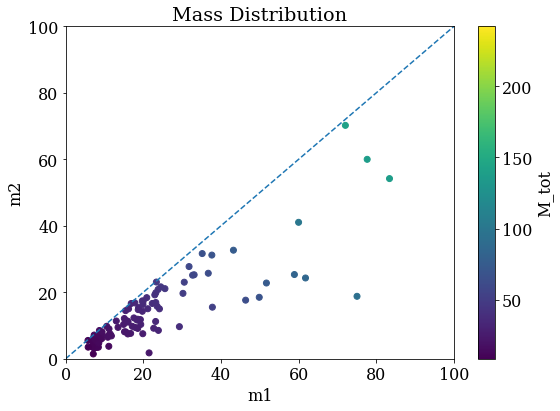

In [161]:
# Mass Distribution
plot_bias_features(df["m1"], df["m2"], df["M_tot"], colormap="viridis", mtot=None,\
    title="Mass Distribution", xlabel="m1", ylabel="m2", cbar_label="M_tot", plt_show=False, savefig='mass_dist')
mmax = 100
plt.xlim(0, mmax)
plt.ylim(0, mmax)
x=np.linspace(0, mmax, 10)
plt.plot(x, x, '--')


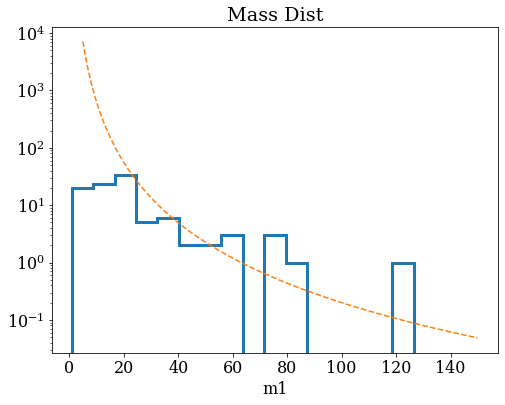

In [162]:
# Mass Distribution
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(1, 150, 20)
x = np.linspace(5, 150, 100)
plt.hist(df["m1"], bins, histtype='step', lw=3)
plt.plot(x, 2000000*x**(-3.5), linestyle='--')

plt.semilogy()

plt.xlabel("m1")
plt.ylabel("")
plt.title("Mass Dist")
plt.show()

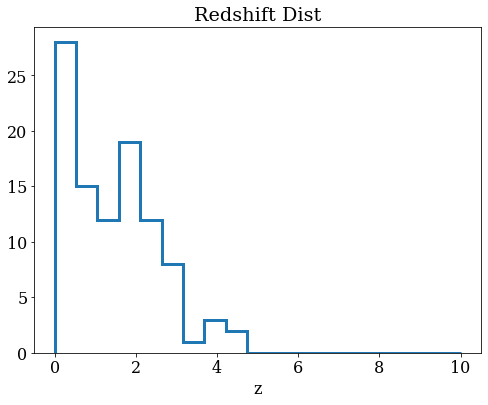

In [163]:
# Redshift Distribution
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(0, 10, 20)

plt.hist(df["z"], bins, histtype='step', lw=3)

plt.xlabel("z")
plt.ylabel("")
plt.title("Redshift Dist")
plt.show()

In [164]:
df["z"].iloc[0]

0.4832640573050811

# Features

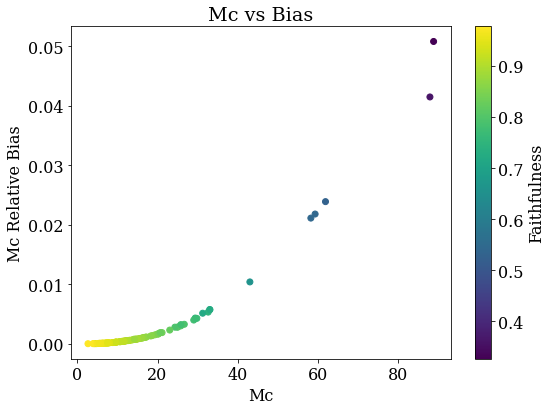

In [165]:
plot_bias_features(df["Mc"], df["Mc_full_bias"]/df["Mc"], df["full_inner_prod"], colormap="viridis",\
    title="Mc vs Bias", xlabel="Mc", ylabel="Mc Relative Bias", cbar_label="Faithfulness")

Lower Mc events tend to have lower bias, higher faithfulness. Higher Mc events tend to have higher bias, lower faithfulness.

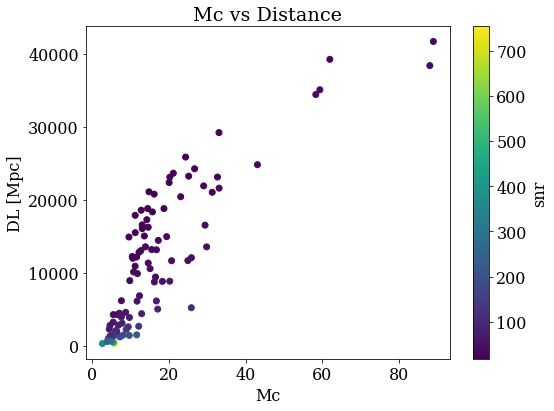

In [166]:
plot_bias_features(df["Mc"], df["DL"], df["snr"], colormap="viridis",\
    title="Mc vs Distance", xlabel="Mc", ylabel="DL [Mpc]", cbar_label="snr")

The events that made it through the gwbench pipeline have to be heavier if they are placed father away.

# Bias Stuff

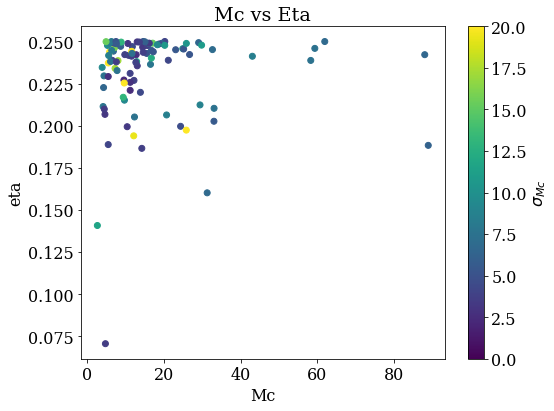

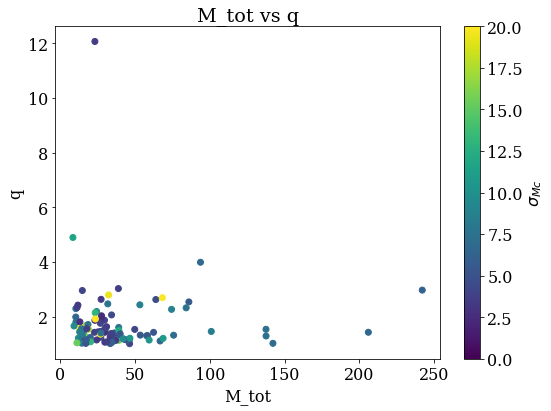

In [167]:
plot_bias_features(df["Mc"], df["eta"], df["Mc_full_bias"]/df["Mc_stat_err"], colormap="viridis",\
    title="Mc vs Eta", xlabel="Mc", ylabel="eta", cbar_label="$\sigma_{Mc}$", vmin=0, vmax=20)

plot_bias_features(df["M_tot"], df["q"], df["Mc_full_bias"]/df["Mc_stat_err"], colormap="viridis",\
    title="M_tot vs q", xlabel="M_tot", ylabel="q", cbar_label="$\sigma_{Mc}$", vmin=0, vmax=20)

All the events (so far) are biased more than 1 $\sigma$. The significance of the bias seems to be larger for migh Mc, unequal masses.

## Mc biases over lambda grid

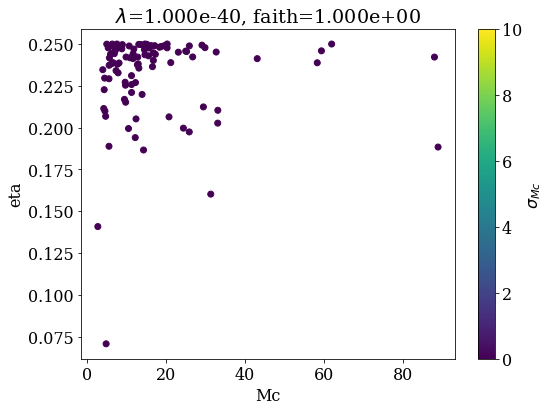

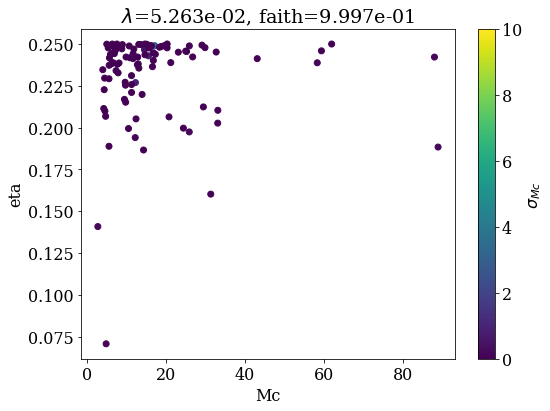

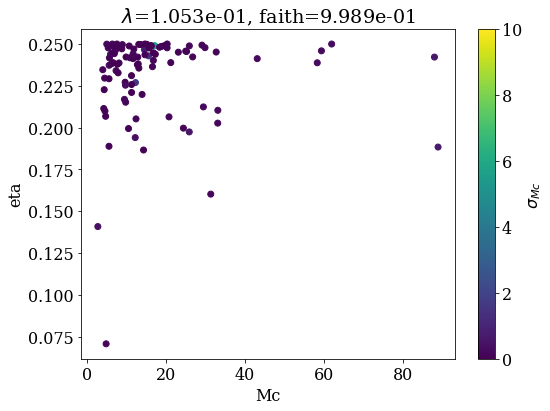

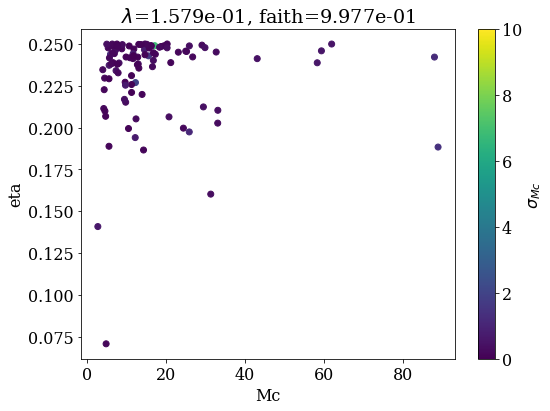

In [197]:
for i, lam in enumerate(lams[::5]):
    plot_bias_features(df["Mc"], df["eta"], df[f"bias_{i}"]/df["Mc_stat_err"], colormap="viridis",\
    title=f"$\lambda$={lams[i]:.3e}, faith={inner_prod_lams.iloc[0,i]:.3e}", xlabel="Mc", ylabel="eta", cbar_label="$\sigma_{Mc}$",\
        show_unbiased=False, vmin=0, vmax=10)

## fraction of unbiased events vs lambda

In [187]:
unbiased_frac = np.zeros(n_lams)
for i in range(n_lams):
    bias = bias_lams.iloc[:,i].values
    stat_err = df["Mc_stat_err"].values
    unbiased_mask = (bias < stat_err)
    unbiased_frac[i] = np.sum(unbiased_mask)/len(df["Mc"])


In [190]:
average_inner_prods = np.zeros(n_lams)
for i in range(n_lams):
    inner_prods = inner_prod_lams.iloc[:,i].values
    average_inner_prods[i] = np.average(inner_prods)

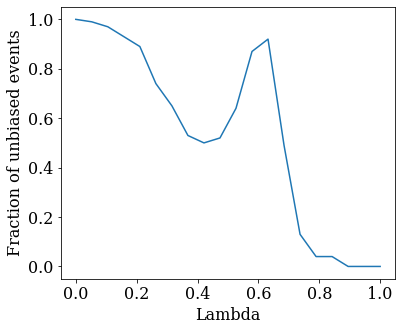

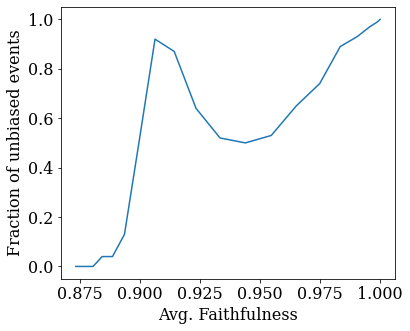

In [193]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(lams, unbiased_frac)
plt.xlabel("Lambda")
plt.ylabel("Fraction of unbiased events")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(average_inner_prods, unbiased_frac)
plt.xlabel("Avg. Faithfulness")
plt.ylabel("Fraction of unbiased events")
plt.show()

I should see if randomizing the orientations fixes this weird peak.

## bias vs faithfulness

[]

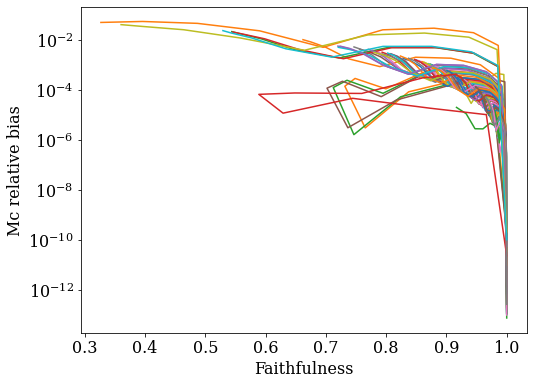

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(df["Mc"])):
    bias = rel_bias_lams.iloc[i,:].values
    inner_prod = inner_prod_lams.iloc[i,:].values
    plt.plot(inner_prod, bias)

plt.xlabel("Faithfulness")
plt.ylabel("Mc relative bias")
plt.semilogy()